In [10]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np

In [2]:
%set_env QXToken="enteryouribmtocken"

env: QXToken=5a94efdb1956b05c58391d53a5f59586f05c845bd7f294f31176e7ae4ca33974fef1869d994dc110bf4638deb3fba368b7c5986a2736782752492c1c3dd218ea


In [40]:
def gen_random_QRN(min_value=0, max_value=100):

    while True:
        range_rn = max_value - min_value + 1
        n_bits = range_rn.bit_length() 

        qc = QuantumCircuit(n_bits)
        for i in range(n_bits):
            qc.h(i)
        
        qc.measure_all()
            
        backend = AerSimulator(noise_model=NoiseModel.from_backend(FakeAlmadenV2()))
        pm = generate_preset_pass_manager(backend=backend,optimization_level=0)
        transpiled_qc = pm.run(qc)
        
        shots = 10000

        sampler = StatevectorSampler(default_shots=shots)
        pub = sampler.run([transpiled_qc])
        job_sampler = pub 
        result_sampler = job_sampler.result()
        counts = result_sampler[0].data.meas.get_counts()

        most_probable_state = max(counts, key=counts.get)

        random_number = int("".join(map(str, most_probable_state)), 2)
        if random_number < range_rn:
            return min_value + random_number


In [48]:
gen_random_QRN(min_value=0, max_value=1024)

672

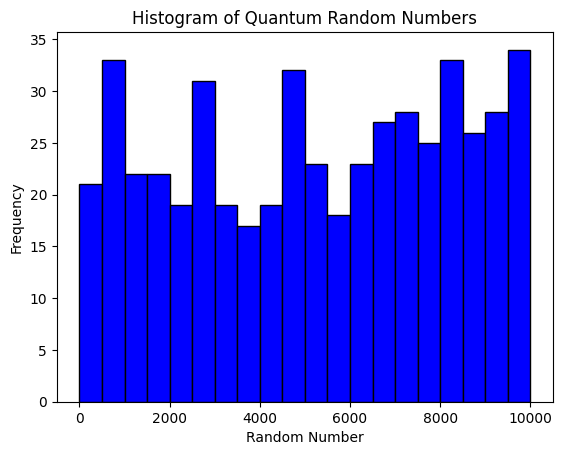

In [49]:
random_numbers = []
for _ in range(500):  
    random_numbers.append(gen_random_QRN(0,10000))

# Plot a histogram of the generated random numbers
plt.hist(random_numbers, bins=20, range=(0, 10000), color='blue', edgecolor='black')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Quantum Random Numbers')
plt.show()

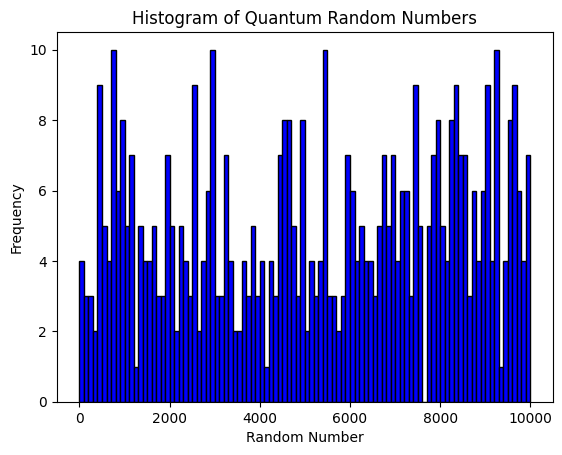

In [50]:
plt.hist(random_numbers, bins=100, range=(0, 10000), color='blue', edgecolor='black')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Quantum Random Numbers')
plt.show()

#Error mitigations Didnt complete.

In [22]:
n_qubits = 4
qc = QuantumCircuit(n_qubits)
for i in range(n_qubits):
    qc.h(i)

qc.measure_all()
    
backend = AerSimulator(noise_model=NoiseModel.from_backend(FakeAlmadenV2()))
pm = generate_preset_pass_manager(backend=backend,optimization_level=0)
transpiled_qc = pm.run(qc)

estimator = Estimator(mode=backend)
estimator.options.resilience.zne_mitigation = True
estimator.options.resilience.zne.noise_factors = (1, 3, 5)
estimator.options.resilience.zne.extrapolator = "exponential"
estimator.options.default_shots = 5000

states = [bin(i)[2:].zfill(n_qubits) for i in range(2 ** n_qubits)]
identity_observable = [SparsePauliOp(states)]

print(identity_observable)

job_sampler = estimator.run([(transpiled_qc, identity_observable)])
# sampler = StatevectorSampler(default_shots=shots)
# pub = sampler.run([transpiled_qc])
# job_sampler = pub 
result = job_sampler.result()[0]
values = result.data.evs

print(values)


print(states)


#probabilities = dict(zip(states, np.abs(counts)**2))

# Get the most probable state
#most_probable_state = max(probabilities, key=probabilities.get)
#print(f"Most probable state (binary): {most_probable_state}")

# Convert this binary state to an integer
#random_number = int(most_probable_state, 2)

QiskitError: 'Pauli string label "0000" is not valid.'

In [53]:
x = generate_QRN(0,10000)
print(x)

3601
